#Makov Decision Proceses

##Exercise 1: Setting Up the Environment

In [14]:
pip install pgmpy matplotlib networkx

##Exercise 2: Building a Simple DBN

In [17]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

# Create DBN structure
dbn = DBN()

# Add nodes and edges
dbn.add_edges_from([(('Rain', 0), ('Sprinkler', 0)),
                     (('Sprinkler', 0), ('WetGrass', 0)),
                     (('Rain', 1), ('WetGrass', 1)),
                     (('Sprinkler', 1), ('WetGrass', 1))])

# Define the Conditional Probability Tables (CPTs)
cpt_rain = TabularCPD(variable=('Rain', 0), variable_card=2, values=[[0.8], [0.2]]) # False, True
cpt_sprinkler = TabularCPD(variable=('Sprinkler', 0), variable_card=2,
                            values=[[0.5, 0.1], [0.5, 0.9]],
                            evidence=[('Rain', 0)], evidence_card=[2]) # False|True
cpt_wet_grass = TabularCPD(variable=('WetGrass', 0), variable_card=2,
                           values=[[0.0, 0.9, 0.8, 0.99], [1.0, 0.1, 0.2, 0.01]],
                           evidence=[('Rain', 0), ('Sprinkler', 0)], evidence_card=[2, 2]) # False|True|True|False

# Add CPDs to the DBN
dbn.add_cpds(cpt_rain, cpt_sprinkler, cpt_wet_grass)

# Check if the model is valid
assert dbn.check_model()

##Exercise 3: Performing Inference

In [19]:
from pgmpy.inference import DBNInference

# Assuming 'dbn' is already defined and trained...
dbn_infer = DBNInference(dbn)

# Query example with evidence
query_result = dbn_infer.forward_inference(variables=[('WetGrass', 0)], evidence={('Rain', 0): 1})
print(query_result)

{('WetGrass', 0): <DiscreteFactor representing phi(('WetGrass', 0):2) at 0x7c471c69c5b0>}


##Exercise 4: Visualizing the DBN

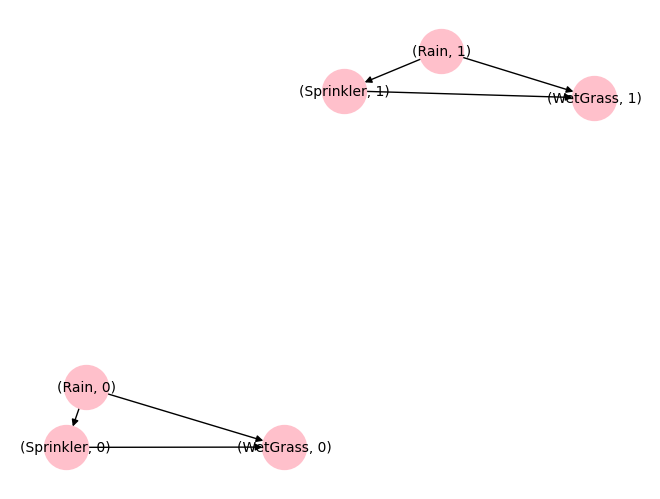

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph from dbn's edges
G = nx.DiGraph()
G.add_edges_from(dbn.edges())

# Draw the graph with labels
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='pink', font_size=10)
plt.show()